In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
for table_name in Base.classes.keys():
    print(table_name)

measurement
station


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement).order_by(Measurement.date.desc()).all()

 ...]

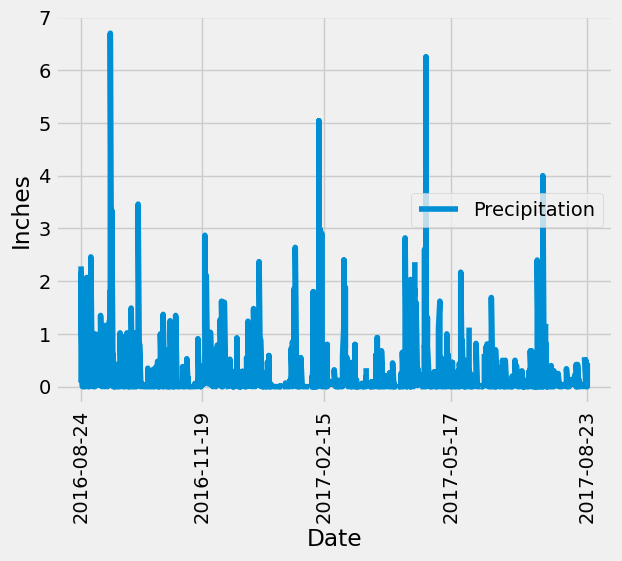

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
query_result = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query_result, columns=['station','date', 'prcp', 'tobs'])
#df = pd.DataFrame([(measurement.date, measurement.prcp, measurement.tobs) for measurement in query_result], columns=['date', 'prcp', 'tobs'])
# Sort the dataframe by date
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date

# Use Pandas Plotting with Matplotlib to plot the data
num_date = len(df['date'])
interval = num_date//4
plt.xticks(df['date'][::interval], labels=[date for date in df['date'][::interval]], rotation=90)

plt.plot(df['date'], df['prcp'])
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(["Precipitation"])

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df['prcp'].describe()
summary_statistics


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(Measurement.station))).scalar()
print(total_stations)

9


In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_station_id = most_active_station[0]
#most_active_station_id = str(most_active_station_id)
most_active_station_id[0]

'USC00519281'

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id[0]).first()

# Extract the statistics
lowest_temperature = temperature_stats[0]
highest_temperature = temperature_stats[1]
average_temperature = temperature_stats[2]
# print(lowest_temperature)
# print(highest_temperature)
# print(average_temperature)
temperature_stats

(54.0, 85.0, 71.66378066378067)

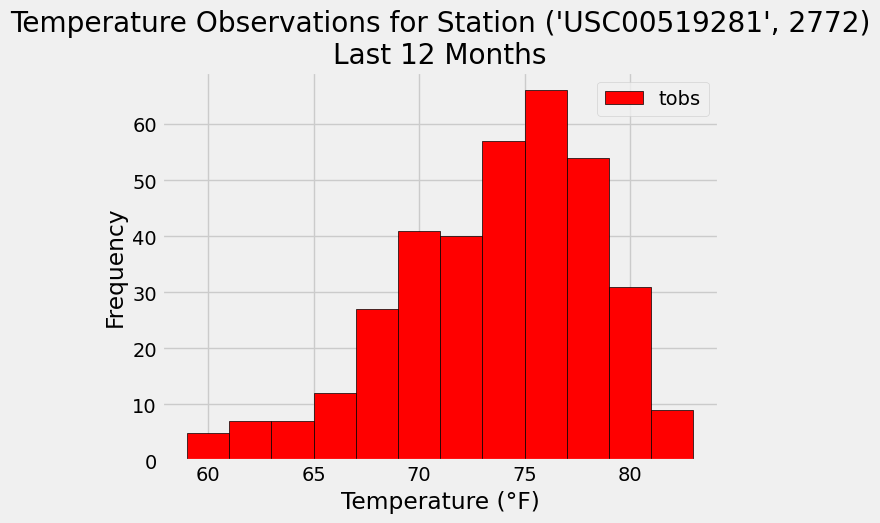

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_result_last_12 = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date > '2016-08-18', Measurement.station == most_active_station_id[0]).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_last12 = pd.DataFrame(query_result_last_12, columns=['station','date', 'prcp', 'tobs'])

# Convert the 'date' column to datetime and then to date
df_last12['date'] = pd.to_datetime(df_last12['date']).dt.date

# Create a histogram of temperature observations
plt.hist(df_last12['tobs'], bins=12, color='r', edgecolor='k', label='tobs')

plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station_id}\nLast 12 Months')
plt.legend()


# Close Session

In [17]:
# Close Session
session.close()